# DS 12. 로지스틱 모형(Activation function: sigmoid, softmax), Fashion_MNIST 다중분류

> "작성완료"

- toc: true
- branch: master
- badges: true
- comments: true
- [python, Data Science]

---
# Data Science
- lenture: Data Science_10-1nd week of lectures.
- lenture date: 2022-05-04
- lecturer: Guebin choi
- study date: 2022-05-06
- author: Kione kim
---

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.experimental.numpy as tnp

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+ s + ';}')

### 로지스틱 모형 (1): 활성화함수로 sigmoid 선택

`-` 기본버전

$$y_i \approx(비례) \text{sigmoid}(b + w_1 x_{1,i} + \dots + w_{784}x_{784,i})=(등호) \frac{\exp(b + w_1 x_{1,i} + \dots + w_{784}x_{784,i})}{1+\exp(b + w_1 x_{1,i} + \dots + w_{784}x_{784,i})}$$

$${\boldsymbol y} \approx \text{sigmoid}({\bf X}{\bf W} + b) = \frac{\exp({\bf XW} +b)}{1+\exp({\bf XW} +b)}$$ 

- sigmoid를 사용하는 이유: 확률계산 및 해석을 손쉽게 하기 위해!
1. y값은 0과 1로 정해져있는 반면, sigmoid를 취해주지 않으면 XW + b의 값이 음수를 포함한 실수가 될 수 있기에 확률을 알기 어려운 점이 있다.
2. x(학점)가 3.0에서 3.5로 증가하면 y(합격)가 얼만큼 증가(합격률)하는지 궁금한데, sigmoid를 취해주지 않으면 이에 대한 확률을 계산하기 어렵다.
-> 확률 계산 및 해석을 쉽게 하기 위해 sigmoid를 취해준다고 보면 된다.

`-` 벡터버전에 사용된 차원 및 연산 정리

- ${\bf X}$: (n,784) matrix 

- ${\boldsymbol y}$: (n,1) matrix

- ${\bf W}$: (784,1) matrix

- $b$: (1,1) matrix

- `+`, `exp` 는 브로드캐스팅

**y 해석: XW+b의 값이 큰 row일 수록 대응하는 y의 row 값은 1, 작은 row일 수록 대응하는 y의 row 값은 0이다.**

### 로지스틱 모형 (2): 활성화함수로 softmax 선택

`원핫인코딩:` $y_i=0 \text{ or } 1$ 대신에 $\boldsymbol{y}_i=[y_{i1},y_{i2}]= [1,0] \text { or } [0,1]$와 같이 코딩
- 원핫인코딩을 하는 이유: 원핫인코딩을 하면 다항분포를 따르게 되므로 오차항을 가정할 수 있고 오차항이 가정되면 loss를 정의할 때 -log likelyhood로 바꿔서 정의할 수 있기 때문이다.

`-` 활성화 함수를 취하기 전의 버전

$$[{\boldsymbol y}_1 ~ {\boldsymbol y}_2] \propto  [ {\bf X}{\bf W}_1  ~ {\bf X}{\bf W}_2] + [b_1 ~ b_2]= {\bf X} [{\bf W}_1 {\bf W}_2] + [b_1 ~ b_2]= {\bf X}{\bf W} + {\boldsymbol b}$$
    
여기에서 매트릭스 및 연산의 차원을 정리하면 아래와 같다. 

- ${\bf X}$: (n,784) matrix 

- ${\boldsymbol y}_1,{\boldsymbol y}_2$: (n,1) matrix

- ${\boldsymbol y}:=[{\boldsymbol y}_1~ {\boldsymbol y}_2]$: (n,2) matrix

- ${\bf W}_1$, ${\bf W}_2$: (784,1) matrix

- ${\bf W}:=[{\bf W}_1~ {\bf W}_2]$: (784,2) matrix

- $b_1,b_2$: (1,1) matrix

- $\boldsymbol{b}:= [b_1 ~b_2] $: (1,2) matrix

- `+` 는 브로드캐스팅



`-` 즉 로지스틱 모형 (1)의 형태를 겹쳐놓은 형태로 해석할 수 있음. 따라서 ${\bf X} {\bf W}_1 + b_1$와 ${\bf X} {\bf W}_2 + b_2$의 row값이 클수록 ${\boldsymbol y}_1$와 ${\boldsymbol y}_2$의 row값이 1이어야 함 

- ${\boldsymbol y}_1 \propto  {\bf X} {\bf W}_1 + b_1$ $\to$ ${\bf X} {\bf W}_1 + b_1$의 row값이 클수록 $\boldsymbol{y}_1$의 row 값이 1이라면 모형계수를 잘 추정한 것 
- ${\boldsymbol y}_2 \propto  {\bf X} {\bf W}_2 + b_2$ $\to$ ${\bf X} {\bf W}_2 + b_2$의 row값이 클수록 $\boldsymbol{y}_2$의 row 값을 1이라면 모형계수를 잘 추정한 것


`질문` ${\bf X}{\bf W}_1 +b_1$의 값이 500, ${\bf X}{\bf W}_2 +b_2$의 값이 200 인 row가 있다면 대응하는 $\boldsymbol{y}_1, \boldsymbol{y}_2$의 row값은 얼마로 적합되어야 할까? 

(1) $[0,0]$

(2) $[0,1]$

(3) $[1,0]$ <- 답

(4) $[1,1]$

: ${\bf X}{\bf W}_1 +b_1$의 값이 ${\bf X}{\bf W}_2 +b_2$의 값보다 크므로 (3)이 답

`목표` 위와 같은 문제의 답을 유도해주는 활성화함수를 설계하자. 즉 합리적인 $\hat{\boldsymbol{y}}_1,\hat{\boldsymbol{y}}_2$를 구해주는 활성화 함수를 설계해보자. 이를 위해서는 아래의 사항들이 충족되어야 한다. 

(1) $\hat{\boldsymbol{y}}_1$, $\hat{\boldsymbol{y}}_2$의 각 원소는 확률을 의미하기 때문에 0보다 크고 1보다 작아야 한다.

(2) $\hat{\boldsymbol{y}}_1+\hat{\boldsymbol{y}}_2={\bf 1}$ 이어야 한다. 확률의 총합은 1 이기 때문

(3) $\hat{\boldsymbol{y}}_1$와 $\hat{\boldsymbol{y}}_2$를 각각 따로 해석하면 모형(1)처럼 로지스틱의 형태로 되었으면 좋겠다. 

`-` 아래와 같은 활성화 함수를 도입하면 어떨까? 

$$\hat{\boldsymbol{y}}=[\hat{\boldsymbol y}_1 ~ \hat{\boldsymbol y}_2] =  \big[ \frac{\exp({\bf X}\hat{{\bf W}}_1+\hat{b}_1)}{\exp({\bf X}\hat{\bf W}_1+\hat{b}_1)+\exp({\bf X}\hat{\bf W}_2+\hat{b}_2)}  ~~ \frac{\exp({\bf X}\hat{\bf W}_2+\hat{b}_2)}{\exp({\bf X}\hat{\bf W}_1+\hat{b}_1)+\exp({\bf X}\hat{\bf W}_2+\hat{b}_2)}  \big]$$ 

$\exp({\bf X}\hat{{\bf W}}_1+\hat{b}_1)$ 을 □, $\exp({\bf X}\hat{{\bf W}}_2+\hat{b}_2)$를 △ 생각해보자.

$\big[\frac{□}{□+△} \frac{△}{□+△}\big]$ 가 되어 (1)과 (2)는 만족한다!

(1) $\hat{\boldsymbol{y}}_1$, $\hat{\boldsymbol{y}}_2$의 각 원소는 0보다 크고 1보다 작아야 한다. -> 만족!

(2) $\hat{\boldsymbol{y}}_1+\hat{\boldsymbol{y}}_2={\bf 1}$ 이어야 한다. -> 만족!

(3) $\hat{\boldsymbol{y}}_1$와 $\hat{\boldsymbol{y}}_2$를 각각 따로 해석하면 로지스틱처럼 되면 좋겠다.  -> ?

`-` 그런데 조금 따져보면 (3)도 만족한다는 것을 알 수 있다. (sigmoid, softmax Section 참고)

`-` 위와 같은 함수를 softmax라고 하고 아래와 같이 정의하자. 

$$
\begin{align}
& \hat{\boldsymbol y} = \text{softmax}({\bf X}{\bf W} + {\boldsymbol b}) \\ 
&= \big[ \frac{\exp({\bf X}\hat{{\bf W}}_1+\hat{b}_1)}{\exp({\bf X}\hat{\bf W}_1+\hat{b}_1)+\exp({\bf X}\hat{\bf W}_2+\hat{b}_2)}  ~~ \frac{\exp({\bf X}\hat{\bf W}_2+\hat{b}_2)}{\exp({\bf X}\hat{\bf W}_1+\hat{b}_1)+\exp({\bf X}\hat{\bf W}_2+\hat{b}_2)}  \big]
\end{align}
$$

### sigmoid, softmax 

#### **softmax는 sigmoid의 확장형**

`-` 아래의 수식을 관찰하자. 
$$\frac{\exp(\beta_0+\beta_1 x_i)}{1+\exp(\beta_0+\beta_1x_i)}=\frac{\exp(\beta_0+\beta_1 x_i)}{e^0+\exp(\beta_0+\beta_1x_i)}$$

`-` 1을 $e^0$로 해석하면 모형2의 해석을 아래와 같이 모형1의 해석으로 적용할수 있다. 
- 모형2: ${\bf X}\hat{\bf W}_1 +\hat{b}_1$ 와 ${\bf X}\hat{\bf W}_2 +\hat{b}_2$ 의 크기를 비교하고 확률 결정
- 모형1: ${\bf X}\hat{\bf W} +\hat{b}$ 와 $0$의 크기를 비교하고 확률 결정 = ${\bf X}\hat{\bf W} +\hat{b}$의 row값이 양수이면 1로 예측하고 음수이면 0으로 예측

- 이항분포를 차원이 2인 다항분포로 해석가능한 것 처럼, sigmoid는 차원이 2인 softmax로 해석가능하다. 즉 다항분포가 이항분포의 확장형으로 해석가능한것 처럼 softmax도 sigmoid의 확장형으로 해석가능하다. 

#### **클래스의 수가 2인 경우 softmax vs sigmoid**

`-` 그럼 클래스가 2인 경우에도 sigmoid 대신 softmax로 활성화함수를 이용해도 되지 않을까? 즉 $y=0 \text{ or } 1$와 같이 정리하지 않고 $y=[0,1] \text{ or } [1,0]$ 와 같이 정리해도 되지 않을까?

`-` 하지만 sigmoid가 좀 더 좋은 선택이다. 즉 $y= 0 \text{ or } 1$로 데이터를 정리하는 것이 더 좋다. 왜냐하면 sigmoid는 softmax와 비교하여 파라메터의 수가 적지만 표현력은 동등하기 때문이다. 
- 파라메터 수: sigmoid의 경우 $W$의 경우 (784×1)이지만 softmax의 경우 $W$의 경우 (784×2)이다.

`-` 표현력이 동등한 이유? 아래 수식을 관찰하자. 

$$\big(\frac{e^{300}}{e^{300}+e^{500}},\frac{e^{500}}{e^{300}+e^{500}}\big) =\big( \frac{e^{0}}{e^{0}+e^{200}}, \frac{e^{200}}{e^{0}+e^{200}}\big)$$

- $\big(\frac{e^{300}}{e^{300}+e^{500}},\frac{e^{500}}{e^{300}+e^{500}}\big)$를 표현하기 위해서 300, 500 이라는 2개의 숫자가 필요한것이 아니고 따지고보면 200이라는 하나의 숫자만 필요하다. 
- $(\hat{\boldsymbol{y}}_1,\hat{\boldsymbol{y}}_2)$의 표현에서도 ${\bf X}\hat{\bf W}_1 +\hat{b}_1$ 와 ${\bf X}\hat{\bf W}_2 +\hat{b}_2$ 라는 숫자 각각이 필요한 것이 아니고 $({\bf X}\hat{\bf W}_1 +\hat{b}_1)-({\bf X}\hat{\bf W}_2 +\hat{b}_2)$의 값만 알면 된다. 

`-` 클래스의 수가 2개일 경우는 softmax가 sigmoid에 비하여 장점이 없다. 하지만 softmax는 클래스의 수가 3개 이상일 경우로 쉽게 확장할 수 있다는 점에서 매력적인 활성화 함수이다. 

#### 분류할 클래스가 3개 이상일 경우 신경망 모형의 설계 

`-` y의 모양

: [0 1 0 0 0 0 0 0 0 0] 

`-` 활성화함수의 선택

: softmax 

`-` 손실함수의 선택

: (categorical) cross entropy

- sigmoid나 softmax를 마지막에 사용하는 이유는 함수의 모양을 떠올려서 생각해볼 수 있다. sigmoid나 softmax는 y의 값이 0-1로 맞춰져 있는 로지스틱에서 사용되는데, 그 이유가 sigmoid나 softmax는 y의 값을 0-1로 맞춰주는 역할을 하기 때문이다. 선형회귀에서 항등함수를 사용한 이유는 y의 값이 0-1인 로지스틱이 아니었기에 그런 형태로 맞춰줄 필요가 없었기 때문이다. 

### Fashion_MNIST 다중분류 

`-` 데이터정리 

In [15]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

- 원핫인코딩: `tf.keras.utils.to_categorical()`을 사용

In [25]:
tf.keras.utils.to_categorical(y_train)

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
X=x_train.reshape(-1,784)
y=tf.keras.utils.to_categorical(y_train)
XX=x_test.reshape(-1,784)
yy=tf.keras.utils.to_categorical(y_test)

`-` 시도1: 간단한 신경망

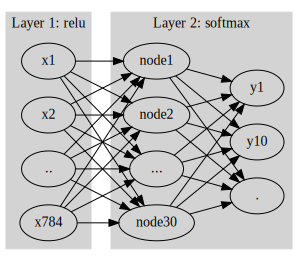

In [27]:
#collapse
gv('''
splines=line
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x1"
    "x2"
    ".."
    "x784"
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x1" -> "node1"
    "x2" -> "node1"
    ".." -> "node1"
    
    "x784" -> "node1"
    "x1" -> "node2"
    "x2" -> "node2"
    ".." -> "node2"
    "x784" -> "node2"
    
    "x1" -> "..."
    "x2" -> "..."
    ".." -> "..."
    "x784" -> "..."

    "x1" -> "node30"
    "x2" -> "node30"
    ".." -> "node30"
    "x784" -> "node30"


    label = "Layer 1: relu"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;

    "node1" -> "y10"
    "node2" -> "y10"
    "..." -> "y10"
    "node30" -> "y10"
    
    "node1" -> "y1"
    "node2" -> "y1"
    "..." -> "y1"
    "node30" -> "y1"
    
    "node1" -> "."
    "node2" -> "."
    "..." -> "."
    "node30" -> "."
    
    label = "Layer 2: softmax"
}
''')

In [28]:
#collapse_output
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics=['accuracy'])
net.fit(X,y,epochs=20,batch_size=1200)

Epoch 1/20
50/50 [==============================] - 1s 10ms/step - loss: 32.5636 - accuracy: 0.3732
Epoch 2/20
50/50 [==============================] - 0s 9ms/step - loss: 2.4426 - accuracy: 0.3876
Epoch 3/20
50/50 [==============================] - 0s 9ms/step - loss: 1.9157 - accuracy: 0.3830
Epoch 4/20
50/50 [==============================] - 0s 9ms/step - loss: 1.7747 - accuracy: 0.4075
Epoch 5/20
50/50 [==============================] - 0s 9ms/step - loss: 1.6499 - accuracy: 0.4506
Epoch 6/20
50/50 [==============================] - 0s 9ms/step - loss: 1.5429 - accuracy: 0.4854
Epoch 7/20
50/50 [==============================] - 0s 10ms/step - loss: 1.4646 - accuracy: 0.4987
Epoch 8/20
50/50 [==============================] - 1s 12ms/step - loss: 1.3988 - accuracy: 0.5224
Epoch 9/20
50/50 [==============================] - 1s 10ms/step - loss: 1.3393 - accuracy: 0.5462
Epoch 10/20
50/50 [==============================] - 1s 10ms/step - loss: 1.2876 - accuracy: 0.5537
Epoch 11/20
5

In [30]:
net.evaluate(XX,yy)

313/313 [==============================] - 1s 2ms/step - loss: 1.0973 - accuracy: 0.6055


[1.0972778797149658, 0.6054999828338623]

- 정확도가 60%정도로 표현력이 조금 떨어지는 것 같다

`-` 시도2: 더 깊은 신경망 

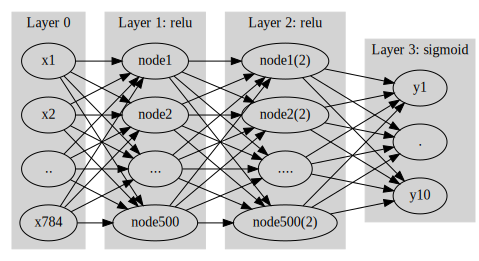

In [11]:
gv('''
splines=line
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x1"
    "x2"
    ".."
    "x784"
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x1" -> "node1"
    "x2" -> "node1"
    ".." -> "node1"
    
    "x784" -> "node1"
    "x1" -> "node2"
    "x2" -> "node2"
    ".." -> "node2"
    "x784" -> "node2"
    
    "x1" -> "..."
    "x2" -> "..."
    ".." -> "..."
    "x784" -> "..."

    "x1" -> "node500"
    "x2" -> "node500"
    ".." -> "node500"
    "x784" -> "node500"


    label = "Layer 1: relu"
}

subgraph cluster_3{
    style=filled;
    color=lightgrey;

    "node1" -> "node1(2)"
    "node2" -> "node1(2)"
    "..." -> "node1(2)"
    "node500" -> "node1(2)"

    "node1" -> "node2(2)"
    "node2" -> "node2(2)"
    "..." -> "node2(2)"
    "node500" -> "node2(2)"
    
    "node1" -> "...."
    "node2" -> "...."
    "..." -> "...."
    "node500" -> "...."
    
    "node1" -> "node500(2)"
    "node2" -> "node500(2)"
    "..." -> "node500(2)"
    "node500" -> "node500(2)"

    
    label = "Layer 2: relu"
}

subgraph cluster_4{
    style=filled;
    color=lightgrey;

    "node1(2)" -> "y10"
    "node2(2)" -> "y10"
    "...." -> "y10"
    "node500(2)" -> "y10"
    
    "node1(2)" -> "y1"
    "node2(2)" -> "y1"
    "...." -> "y1"
    "node500(2)" -> "y1"
    
    "node1(2)" -> "."
    "node2(2)" -> "."
    "...." -> "."
    "node500(2)" -> "."
    
    label = "Layer 3: sigmoid"
}
''')

In [12]:
#collapse_output
tf.random.set_seed(43052)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(500,activation='relu'))
net.add(tf.keras.layers.Dense(500,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics=['accuracy'])
net.fit(X,y,epochs=50,batch_size=1200)

Epoch 1/50
50/50 [==============================] - 4s 77ms/step - loss: 21.5888 - accuracy: 0.6877
Epoch 2/50
50/50 [==============================] - 4s 87ms/step - loss: 1.9781 - accuracy: 0.8038
Epoch 3/50
50/50 [==============================] - 4s 76ms/step - loss: 1.2649 - accuracy: 0.8204
Epoch 4/50
50/50 [==============================] - 4s 78ms/step - loss: 0.9467 - accuracy: 0.8335
Epoch 5/50
50/50 [==============================] - 5s 96ms/step - loss: 0.7478 - accuracy: 0.8451
Epoch 6/50
50/50 [==============================] - 4s 88ms/step - loss: 0.6173 - accuracy: 0.8554
Epoch 7/50
50/50 [==============================] - 4s 76ms/step - loss: 0.5651 - accuracy: 0.8599
Epoch 8/50
50/50 [==============================] - 4s 72ms/step - loss: 0.4842 - accuracy: 0.8712
Epoch 9/50
50/50 [==============================] - 4s 81ms/step - loss: 0.4490 - accuracy: 0.8732
Epoch 10/50
50/50 [==============================] - 4s 78ms/step - loss: 0.3920 - accuracy: 0.8840
Epoch 11

In [14]:
net.evaluate(XX,yy)

313/313 [==============================] - 2s 6ms/step - loss: 0.7337 - accuracy: 0.8618


[0.7337304949760437, 0.8618000149726868]

#### 추가학습

`-` 시도1,2에서 사용된 모형에서 각각 추정해야할 파라메터의 수를 구하고 비교하라. 

**hint: `net.summary()` 이용**

In [31]:
#collapse_output
tf.random.set_seed(43052)
net1 = tf.keras.Sequential()
net1.add(tf.keras.layers.Dense(30,activation='relu'))
net1.add(tf.keras.layers.Dense(10,activation='softmax'))
net1.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics=['accuracy'])
net1.fit(X,y,epochs=20,batch_size=1200)

Epoch 1/20
50/50 [==============================] - 1s 10ms/step - loss: 32.5636 - accuracy: 0.3732
Epoch 2/20
50/50 [==============================] - 0s 9ms/step - loss: 2.4426 - accuracy: 0.3876
Epoch 3/20
50/50 [==============================] - 0s 10ms/step - loss: 1.9157 - accuracy: 0.3830
Epoch 4/20
50/50 [==============================] - 0s 10ms/step - loss: 1.7747 - accuracy: 0.4075
Epoch 5/20
50/50 [==============================] - 1s 10ms/step - loss: 1.6499 - accuracy: 0.4506
Epoch 6/20
50/50 [==============================] - 0s 9ms/step - loss: 1.5429 - accuracy: 0.4854
Epoch 7/20
50/50 [==============================] - 0s 10ms/step - loss: 1.4646 - accuracy: 0.4987
Epoch 8/20
50/50 [==============================] - 0s 9ms/step - loss: 1.3988 - accuracy: 0.5224
Epoch 9/20
50/50 [==============================] - 0s 10ms/step - loss: 1.3393 - accuracy: 0.5462
Epoch 10/20
50/50 [==============================] - 0s 9ms/step - loss: 1.2876 - accuracy: 0.5537
Epoch 11/20


In [32]:
net1.evaluate(XX,yy)

313/313 [==============================] - 1s 3ms/step - loss: 1.0973 - accuracy: 0.6055


[1.0972778797149658, 0.6054999828338623]

In [33]:
#collapse_output
tf.random.set_seed(43052)
net2 = tf.keras.Sequential()
net2.add(tf.keras.layers.Dense(500,activation='relu'))
net2.add(tf.keras.layers.Dense(500,activation='relu'))
net2.add(tf.keras.layers.Dense(10,activation='softmax'))
net2.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics=['accuracy'])
net2.fit(X,y,epochs=50,batch_size=1200)

Epoch 1/50
50/50 [==============================] - 5s 81ms/step - loss: 21.5888 - accuracy: 0.6877
Epoch 2/50
50/50 [==============================] - 4s 79ms/step - loss: 1.9781 - accuracy: 0.8038
Epoch 3/50
50/50 [==============================] - 4s 80ms/step - loss: 1.2649 - accuracy: 0.8204
Epoch 4/50
50/50 [==============================] - 4s 76ms/step - loss: 0.9467 - accuracy: 0.8335
Epoch 5/50
50/50 [==============================] - 4s 73ms/step - loss: 0.7478 - accuracy: 0.8451
Epoch 6/50
50/50 [==============================] - 4s 74ms/step - loss: 0.6173 - accuracy: 0.8554
Epoch 7/50
50/50 [==============================] - 4s 78ms/step - loss: 0.5651 - accuracy: 0.8599
Epoch 8/50
50/50 [==============================] - 4s 78ms/step - loss: 0.4842 - accuracy: 0.8712
Epoch 9/50
50/50 [==============================] - 4s 76ms/step - loss: 0.4490 - accuracy: 0.8732
Epoch 10/50
50/50 [==============================] - 4s 76ms/step - loss: 0.3920 - accuracy: 0.8840
Epoch 11

In [34]:
net2.evaluate(XX,yy)

313/313 [==============================] - 2s 5ms/step - loss: 0.7337 - accuracy: 0.8618


[0.7337304949760437, 0.8618000149726868]

In [35]:
net1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 30)                23550     
                                                                 
 dense_16 (Dense)            (None, 10)                310       
                                                                 
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [36]:
net2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 500)               392500    
                                                                 
 dense_18 (Dense)            (None, 500)               250500    
                                                                 
 dense_19 (Dense)            (None, 10)                5010      
                                                                 
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


- 시도1에서 추정해야할 파라메터 수는 $23860$개 이다.
- 시도2에서 추정해야할 파라메터 수는 $648010$개 이다.
- 시도2에서 추정해야할 파라메터 수가 시도1에서 추정해야할 파라메터 수보다 훨씬(약 62만 개) 많다.